# Examples for the LLSSystem Class (v1.1.1)

In [1]:
%matplotlib inline

In [2]:
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.isgm import lls as ltlls

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Simple Instantiate

In [3]:
reload(ltlls)
lls = ltlls.LLSSystem((0.*u.deg, 0.*u.deg), 2.5, None, NHI=17.9)
lls

[LLSSystem: 00:00:00 +00:00:00, zabs=2.5, NHI=17.9, tau_LL=5.03537, [Z/H]=0 dex]

## Generate/plot a model

In [4]:
# Fill HI lines
lls.fill_lls_lines()

linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton03_table2.fits.gz
read_sets: Using set file -- 
  /Users/xavier/local/Python/linetools/linetools/lists/sets/llist_v0.3.ascii


In [5]:
# Generate a spectrum
wave = np.arange(3000., 6500)
npix = len(wave)
spec = XSpectrum1D.from_tuple((wave*u.AA,np.ones(npix)))

/Users/xavier/local/Python/linetools/linetools/analysis/voigt.py:177: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/Users/xavier/local/Python/linetools/linetools/analysis/voigt.py:178: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')
/Users/xavier/local/Python/linetools/linetools/analysis/voigt.py:213: UserWarning: Rebinned tau back to your input array.  Reconsider input
  warnings.warn('Rebinned tau back to your input array.  Reconsider input')


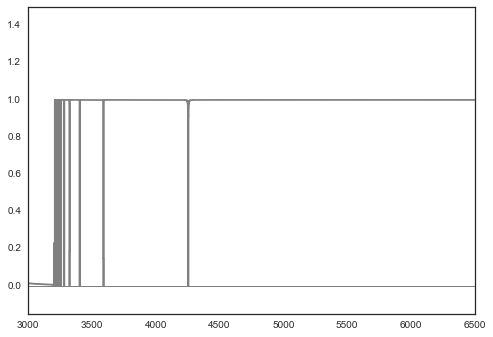

In [6]:
# Model
model = lls.flux_model(spec)
model.plot()

## From a JXP .dat file 

(use of these .dat files is no longer recommended)

In [7]:
reload(ltlls)
datfil = 'Data/UM184.z2929.dat'
lls = ltlls.LLSSystem.from_datfile(dat_file=datfil, tree=os.getenv('LLSTREE'))
lls

[LLSSystem: 23:50:57.87 -00:52:09.9, zabs=2.93012, NHI=18.5, tau_LL=20.0462, [Z/H]=0 dex]

In [8]:
print(lls.nsub)
lls.subsys['A']._datdict

1


{u'Fe_H': 0.0,
 u'NH': 0.0,
 u'NHI': 18.5,
 u'NHIsig': array([ 1.1,  0.4]),
 u'NHsig': array([ 0.,  0.]),
 u'U': 0.0,
 u'Usig': array([ 0.,  0.]),
 u'VPFIT_file': u'',
 u'alpha_H': 0.0,
 u'bsig': 0.0,
 u'bval': 0.0,
 u'clm_file': u'Abund/UM184.z2929_MAGE.clm',
 u'flg_Fe': 0,
 u'flg_alpha': 0,
 u'flg_low': 0,
 u'logx': 0.0,
 u'sig_Fe_H': 0.0,
 u'sig_a_H': 0.0,
 u'sigx': array([ 0.,  0.]),
 u'zabs': 2.93}

In [9]:
lls._datdict

OrderedDict([(u'QSO name', u'UM184'),
             (u'RA (2000)', u'23:50:57.87'),
             (u'DEC (2000)', u'-00:52:09.9'),
             (u'QSO zem', u'3.021000'),
             (u'flg_QSOmag', u'0'),
             (u'QSO Mag', u'0.000000'),
             (u'QSO Survey', u'0'),
             (u'Survey', u'0.00000'),
             (u'Referenc', u''),
             (u'SDSS plt,fib,mjd', u'0     0      0'),
             (u'zabs', u'2.93012'),
             (u'NHI tot', u'18.5000'),
             (u'NHI sig', u'1.1000   0.4000'),
             (u'NH tot', u'0.0000'),
             (u'NH sig', u'0.0000   0.0000'),
             (u'vmn,vmx (2f7)', u'0.0    0.0'),
             (u'fdelv', u'0.00'),
             (u'fmm', u'0.00'),
             (u'fedg', u'0.00'),
             (u'ftpk', u'0.00'),
             (u'flg_M/H', u'0'),
             (u'[M/H] ave', u'0.00'),
             (u'sig[M/H]', u'0.00'),
             (u'flg_D/H', u'0'),
             (u'[D/H]', u'0.000000'),
             (u'N subsys', u'

### Load up ions

In [10]:
lls.get_ions(use_clmfile=True)

linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton03_table2.fits.gz
linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton00_table2.fits.gz
linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/verner94_tab6.fits


linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/EUV_lines.ascii
read_sets: Using set file -- 
  /Users/xavier/local/Python/linetools/linetools/lists/sets/llist_v0.3.ascii


In [11]:
lls._ionN

Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN
,,,,,km / s,km / s,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64
6,1,0,0.0,2.93,-204.0,60.0,3,13.091,0.0
6,2,0,0.0,2.93,-204.0,60.0,1,14.004,0.038
6,4,0,0.0,2.93,-204.0,191.0,1,13.9,0.019
8,1,0,0.0,2.93,-204.0,60.0,1,14.162,0.059
13,2,0,0.0,2.93,-204.0,60.0,1,12.591,0.06
13,3,0,0.0,2.93,-204.0,60.0,3,12.752,0.0
14,2,0,0.0,2.93,-204.0,60.0,1,13.7,0.046
14,4,0,0.0,2.93,-243.0,101.0,1,13.517,0.03
